In [1]:
import pandas as pd

data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
x=data.iloc[:,[2,3,4]]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Get a list of categorical columns
categorical_cols = data.select_dtypes(include='object').columns
# Apply the label encoder to each categorical column
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    
data[col]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int32

In [5]:
from sklearn.cluster import DBSCAN
from itertools import product


In [6]:
import numpy as np

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
DBSCAN_params

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.25, 6),
 (10.25, 7),
 (10.25, 8),
 (10.25, 9),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.5, 6),
 (10.5, 7),
 (10.5, 8),
 (10.5, 9),
 (10.75, 3),
 (10.75, 4),
 (10.75, 5),
 (10.75, 6),
 (10.75, 7),
 (10.75, 8),
 (10.75, 9),
 (11.0

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(x)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(x, DBS_clustering.labels_))

In [9]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
print(tmp.to_string())

       Eps  Min_samples  No_of_clusters
0     8.00            3              17
1     8.00            4              10
2     8.00            5               7
3     8.00            6               8
4     8.00            7               6
5     8.00            8               5
6     8.00            9               4
7     8.25            3              14
8     8.25            4              11
9     8.25            5               8
10    8.25            6               8
11    8.25            7               7
12    8.25            8               5
13    8.25            9               4
14    8.50            3              13
15    8.50            4              10
16    8.50            5               8
17    8.50            6               8
18    8.50            7               7
19    8.50            8               6
20    8.50            9               4
21    8.75            3              12
22    8.75            4               8
23    8.75            5               6


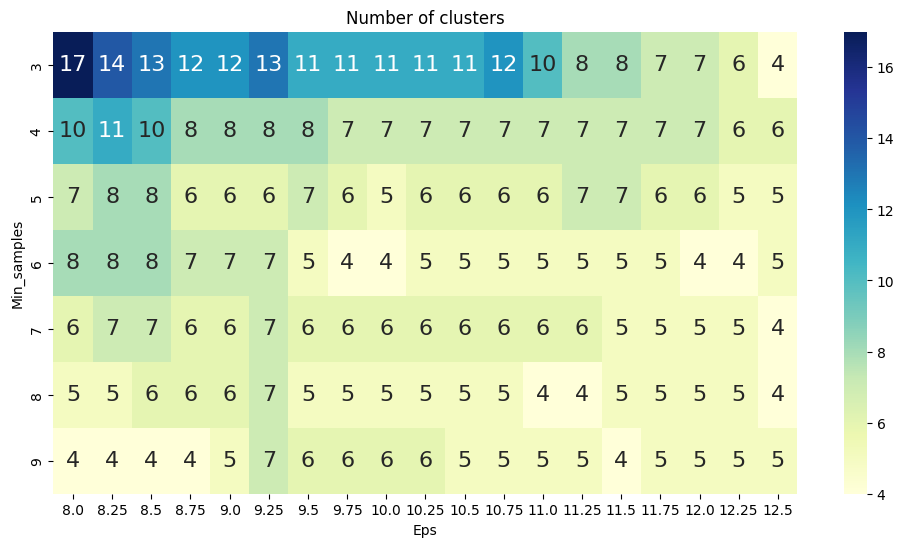

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()


In [11]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
print(tmp.to_string())

       Eps  Min_samples  Sil_score
0     8.00            3   0.035232
1     8.00            4  -0.021474
2     8.00            5   0.013117
3     8.00            6  -0.037857
4     8.00            7  -0.126911
5     8.00            8  -0.163201
6     8.00            9  -0.229525
7     8.25            3   0.117940
8     8.25            4   0.030919
9     8.25            5   0.002612
10    8.25            6  -0.010658
11    8.25            7  -0.078433
12    8.25            8  -0.150768
13    8.25            9  -0.219381
14    8.50            3   0.102183
15    8.50            4   0.035255
16    8.50            5   0.012783
17    8.50            6  -0.002641
18    8.50            7  -0.057649
19    8.50            8  -0.114424
20    8.50            9  -0.208293
21    8.75            3   0.107942
22    8.75            4   0.085121
23    8.75            5   0.076876
24    8.75            6  -0.005314
25    8.75            7   0.009674
26    8.75            8  -0.089837
27    8.75          

In [12]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(x)

In [13]:
DBSCAN_clustered = x.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [14]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


In [15]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
outliers

,Age,Annual Income (k$),Spending Score (1-100),Cluster
2,20,16,6,-1
6,35,18,6,-1
7,23,18,94,-1
10,67,19,14,-1
11,35,19,99,-1
14,37,20,13,-1
19,35,23,98,-1
40,65,38,35,-1
158,34,78,1,-1
187,28,101,68,-1


TypeError: scatterplot() got multiple values for argument 'data'

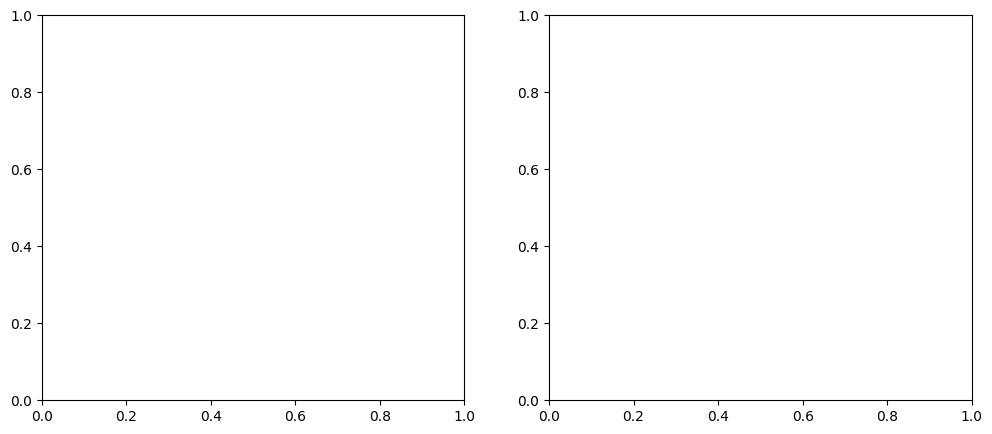

In [16]:
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.show()

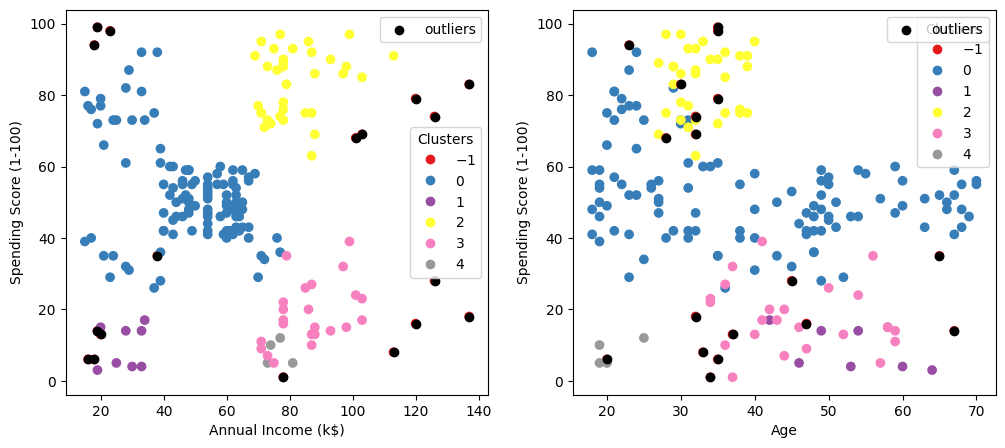

In [19]:
import matplotlib.pyplot as plt

# Plotting
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Annual Income vs Spending Score
scatter1 = axes[0].scatter(DBSCAN_clustered['Annual Income (k$)'], DBSCAN_clustered['Spending Score (1-100)'],
                           c=DBSCAN_clustered['Cluster'], cmap='Set1')
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], label='outliers', c="k")
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Clusters")
axes[0].add_artist(legend1)
axes[0].legend()

# Scatter plot for Age vs Spending Score
scatter2 = axes[1].scatter(DBSCAN_clustered['Age'], DBSCAN_clustered['Spending Score (1-100)'],
                           c=DBSCAN_clustered['Cluster'], cmap='Set1')
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], label='outliers', c="k")
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Clusters")
axes[1].add_artist(legend2)
axes[1].legend()

plt.show()


In [ ]:
winedata=pd.read_csv('wine-clustering.csv')

In [ ]:
winedata

In [ ]:
winedata.corr()

In [ ]:
XX= winedata.loc[:, ['Alcohol', 'OD280', 'Total_Phenols', 'Color_Intensity', 'Proline']]


In [ ]:
from sklearn.cluster import DBSCAN
from itertools import product

In [ ]:
import numpy as np

In [ ]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
DBSCAN_params

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(XX)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(XX, DBS_clustering.labels_))

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
print(tmp.to_string())

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
print(tmp.to_string())

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=6,min_samples=7,metric='euclidean')

model=db.fit(x)#fitting the model

labels=model.labels_ #how many clusters/groups we are getting
labels

means=db.fit_predict(x)
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=means,cmap='gist_ncar')

n_clusters = len(set(labels))-(1 if -1 in labels else 0)#number of clusters in labels , ignoring noise if presnt

n_noise = list(labels).count(-1)
print('number of clusters: ',n_clusters)
print('number of noises: ',n_noise)

data['cluster']=labels
data.tail(30)

plt.figure(figsize=(7,5))

df1 = data[data.cluster==-1]
df2 = data[data.cluster==0]
df3 = data[data.cluster==1]
df4 = data[data.cluster==2]





plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green',label='Cluster-1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue',label='Cluster0')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='purple',label='Cluster1')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='red',label='Cluster2')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN clustering')
plt.show()